#Predicting Automobile Pricing Using Neural Networks



###Importing Libraries

In [493]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import warnings

# Machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

%matplotlib inline
pd.set_option("display.max_rows",None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

### Loading Data

In [494]:
# Importing Dataset
auto = pd.read_csv('/content/Neural network Data set.csv')
auto.head()

,Price,Age,KM,Fuel,HP,MC,Colour,Auto,CC,Drs,Cyl,Grs,Wght,G_P,Mfr_G,ABS,Abag_1,Abag_2,AC,Comp,CD,Clock,Pw,PStr,Radio,SpM,M_Rim,Tow_Bar
0,21000.0,26,31463,Petrol,195,0,Silver,0,1800,3,3,6,1189,10,1,1,1,1,1,0,1,1,1,1,0,0,1,0
1,20000.0,23,43612,Petrol,195,0,Red,0,1800,3,3,6,1189,4,1,1,1,1,1,1,0,1,1,1,0,1,1,0
2,19650.0,26,32191,Petrol,195,0,Red,0,1800,3,3,6,1189,4,1,1,1,1,1,1,0,1,1,1,0,1,1,0
3,21550.0,32,23002,Petrol,195,1,Black,0,1800,3,3,6,1189,4,1,1,1,1,1,1,1,1,1,1,0,1,1,0
4,22550.0,33,34133,Petrol,195,1,Grey,0,1800,3,3,6,1189,4,1,1,1,1,1,1,1,1,1,1,0,1,1,0


In [495]:
# Data type information
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    31 non-null     float64
 1   Age      31 non-null     int64  
 2   KM       31 non-null     int64  
 3   Fuel     31 non-null     object 
 4   HP       31 non-null     int64  
 5   MC       31 non-null     int64  
 6   Colour   31 non-null     object 
 7   Auto     31 non-null     int64  
 8   CC       31 non-null     int64  
 9   Drs      31 non-null     int64  
 10  Cyl      31 non-null     int64  
 11  Grs      31 non-null     int64  
 12  Wght     31 non-null     int64  
 13  G_P      31 non-null     int64  
 14  Mfr_G    31 non-null     int64  
 15  ABS      31 non-null     int64  
 16  Abag_1   31 non-null     int64  
 17  Abag_2   31 non-null     int64  
 18  AC       31 non-null     int64  
 19  Comp     31 non-null     int64  
 20  CD       31 non-null     int64  
 21  Clock    31 non-nu

In [496]:
# Data Shape
auto.shape

(31, 28)

There are 28 columns including 1 target column, i.e, 'Price'. A total of 31 entires are there in the dataset.

In [497]:
# Descriptive statistics
auto.describe()

,Price,Age,KM,HP,MC,Auto,CC,Drs,Cyl,Grs,Wght,G_P,Mfr_G,ABS,Abag_1,Abag_2,AC,Comp,CD,Clock,Pw,PStr,Radio,SpM,M_Rim,Tow_Bar
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000
mean,17251.451613,27.935484,33627.677419,126.903226,0.645161,0.032258,1574.193548,3.0,3.0,5.193548,1129.967742,4.903226,0.903226,1.0,1.0,0.935484,0.548387,0.903226,0.612903,0.903226,0.903226,1.0,0.064516,0.806452,0.387097,0.161290
std,2544.533092,3.021429,13967.303589,37.830636,0.486373,0.179605,152.682114,0.0,0.0,0.401610,36.088303,3.176527,0.300537,0.0,0.0,0.249731,0.505879,0.300537,0.495138,0.300537,0.300537,0.0,0.249731,0.401610,0.495138,0.373878
min,13000.000000,23.000000,9752.000000,100.000000,0.000000,0.000000,1400.000000,3.0,3.0,5.000000,1069.000000,4.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,15800.000000,26.000000,25448.000000,100.000000,0.000000,0.000000,1400.000000,3.0,3.0,5.000000,1104.000000,4.000000,1.000000,1.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000
50%,16300.000000,28.000000,32222.000000,113.000000,1.000000,0.000000,1600.000000,3.0,3.0,5.000000,1124.000000,4.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000
75%,18000.000000,30.000000,42209.500000,113.000000,1.000000,0.000000,1600.000000,3.0,3.0,5.000000,1149.000000,4.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,0.000000
max,22800.000000,33.000000,67662.000000,195.000000,1.000000,1.000000,1800.000000,3.0,3.0,6.000000,1189.000000,20.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [498]:
# Checking  for null values
auto.isna().sum()

Price      0
Age        0
KM         0
Fuel       0
HP         0
MC         0
Colour     0
Auto       0
CC         0
Drs        0
Cyl        0
Grs        0
Wght       0
G_P        0
Mfr_G      0
ABS        0
Abag_1     0
Abag_2     0
AC         0
Comp       0
CD         0
Clock      0
Pw         0
PStr       0
Radio      0
SpM        0
M_Rim      0
Tow_Bar    0
dtype: int64

### Exploratory Data Analysis

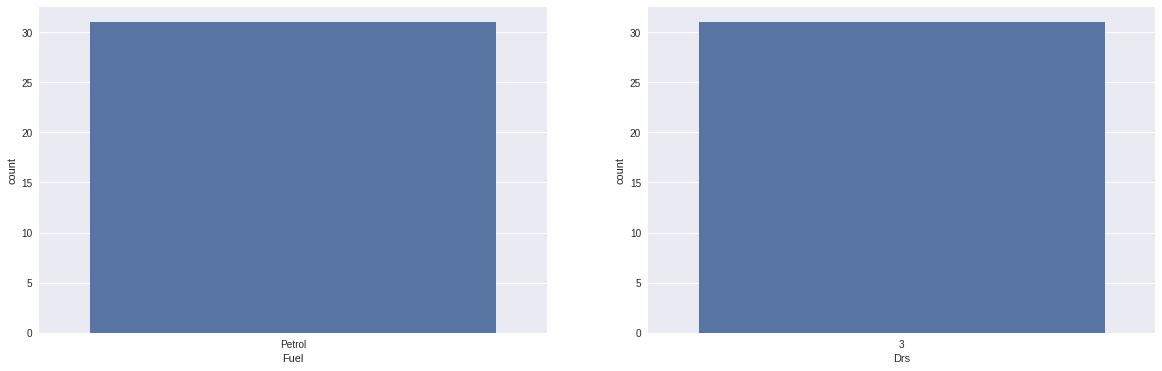

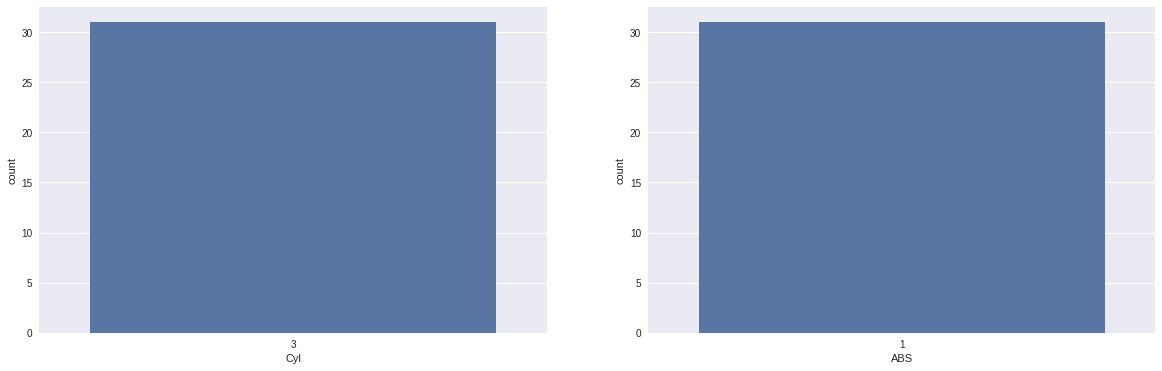

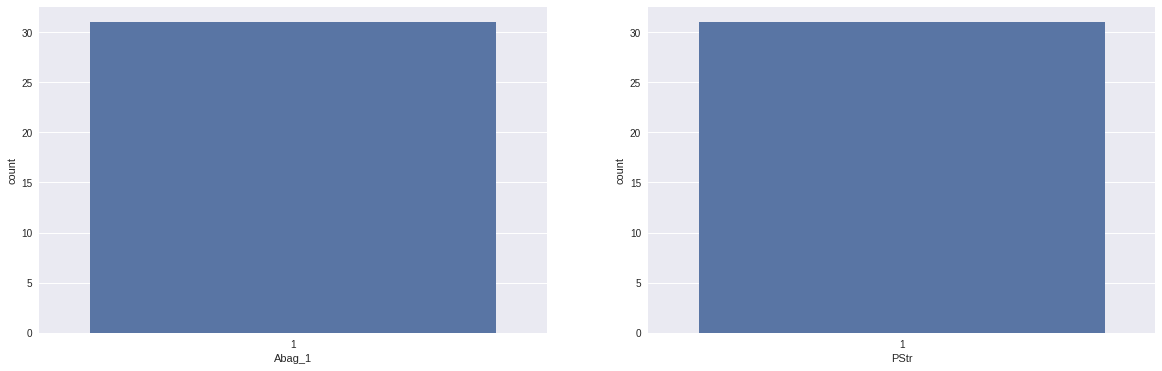

In [499]:
# Checking columns with only 1 unique value
cols = ['Fuel','Drs', 'Cyl','ABS',	'Abag_1', 'PStr']
i = 0
while i < 6:
    fig = plt.figure(figsize=[20,6])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cols[i], data=auto)
    i +=1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cols[i], data=auto)
    i += 1

    plt.show()

As we can see that all these columns all have 1 single unique value and it will not matter during prediction as all rows have same value and hence these columns are redundant for prediction.

In [500]:
# Dropping redundant columns
cols = ['Fuel','Drs', 'Cyl','ABS',	'Abag_1', 'PStr']
new_auto = auto.drop(cols, axis=1)
new_auto.head()

,Price,Age,KM,HP,MC,Colour,Auto,CC,Grs,Wght,G_P,Mfr_G,Abag_2,AC,Comp,CD,Clock,Pw,Radio,SpM,M_Rim,Tow_Bar
0,21000.0,26,31463,195,0,Silver,0,1800,6,1189,10,1,1,1,0,1,1,1,0,0,1,0
1,20000.0,23,43612,195,0,Red,0,1800,6,1189,4,1,1,1,1,0,1,1,0,1,1,0
2,19650.0,26,32191,195,0,Red,0,1800,6,1189,4,1,1,1,1,0,1,1,0,1,1,0
3,21550.0,32,23002,195,1,Black,0,1800,6,1189,4,1,1,1,1,1,1,1,0,1,1,0
4,22550.0,33,34133,195,1,Grey,0,1800,6,1189,4,1,1,1,1,1,1,1,0,1,1,0


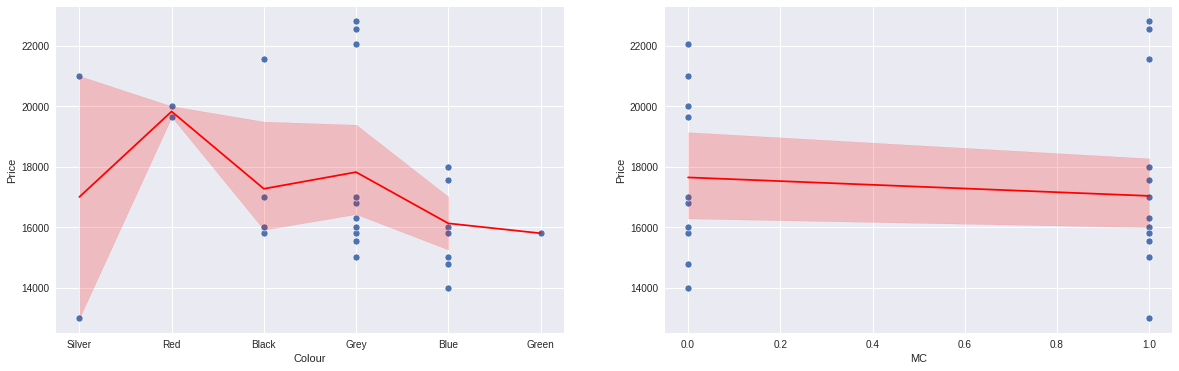

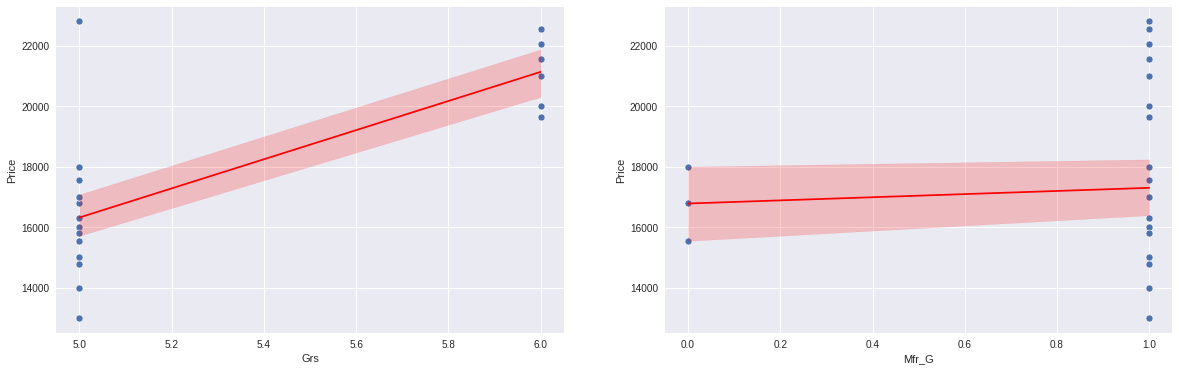

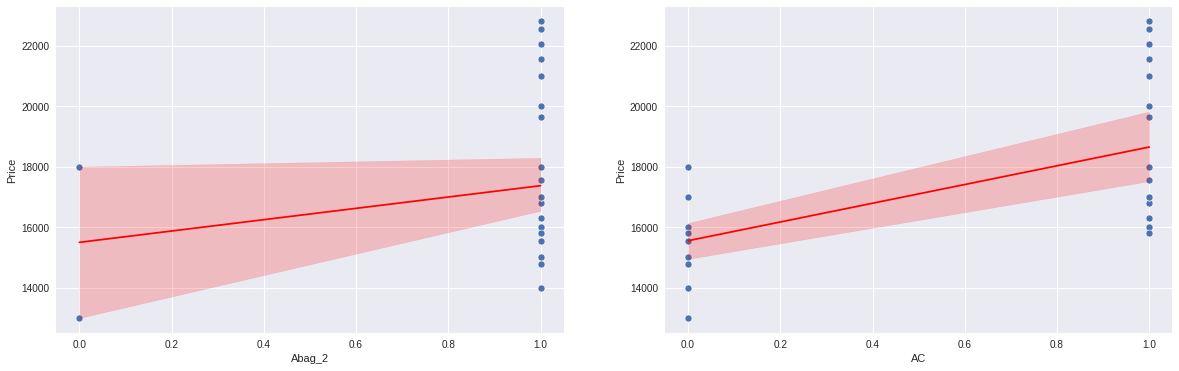

In [501]:
# Comparing features with Price
cols = ['Colour','MC', 'Grs','Mfr_G','Abag_2', 'AC']
i = 0
while i < 6:
    fig = plt.figure(figsize=[20,6])
    
    plt.subplot(1,2,1)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i +=1
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i += 1

    plt.show()

###Comparison of features with Price

####1.  Colour

Grey and Blue cars are greater in demand. Silver, Black, Red and Grey cars have a scope of having higher price.

####2.   Metallic Colour

There is no significant difference between having a metallic colour and not having a metallic colour.

####3.   Gears

Higher the number of gears, more is the price.

####4.   Manufacturer's Guarantee Period

Cars with manufacturer's guarantee tend to have a higher price, but the mean price is similar to cars without guarantee.

####5.   Passenger Airbag

While all cars are havind driver's airbag. Cars with passenger airbag cost higher than cars without one.

####6.   Air Conditioning

Cars with Air conditioning cost more than cars without one.



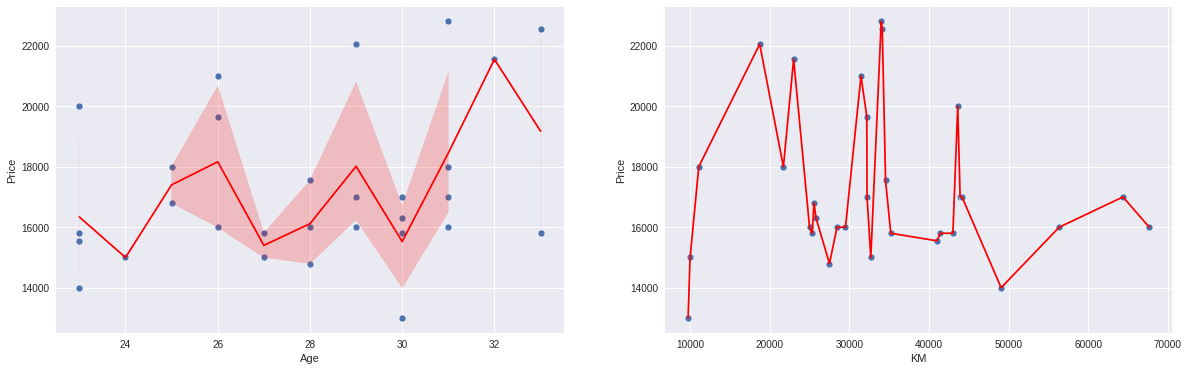

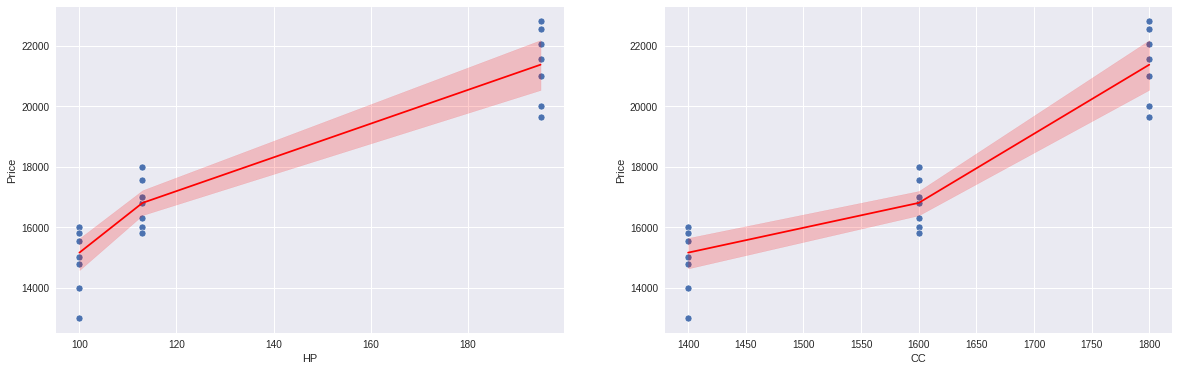

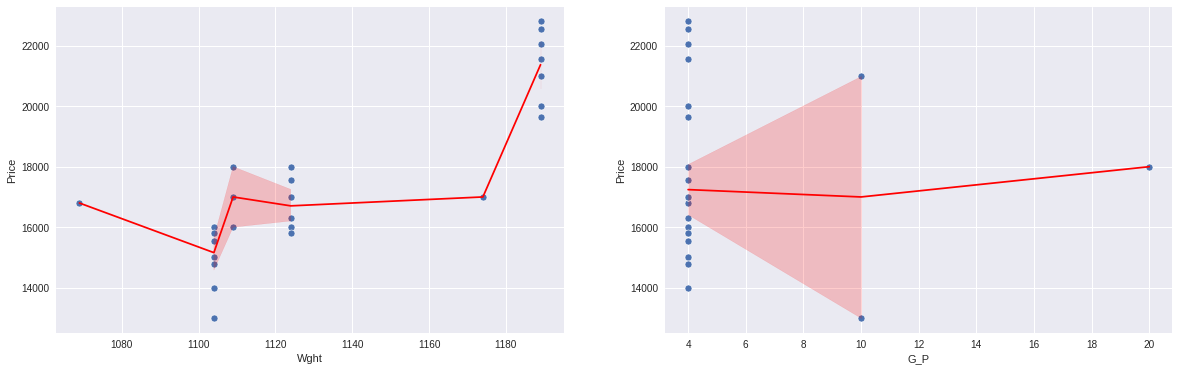

In [502]:
# Comparing features with Price
cols = ['Age','KM', 'HP','CC','Wght', 'G_P']
i = 0
while i < 6:
    fig = plt.figure(figsize=[20,6])
    
    plt.subplot(1,2,1)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i +=1
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i += 1

    plt.show()

###Comparison of features with Price

####1.  Age

The distribution is unevenly distributed and doesn't suggest much information.

####2.   Kilometres driven

More the Kilometres, lesser the cost of the car.

####3.   Horsepower

Higher the number of horsepower, more is the price.

####4.   Cylindrical Volume

Higher the number of CC, more is the price.

####5.   Weight

More the weight, more is the price.

####6.   Guarantee Period

Cars within 4 months of Guarantee period sell a lot, and have varied pricing.



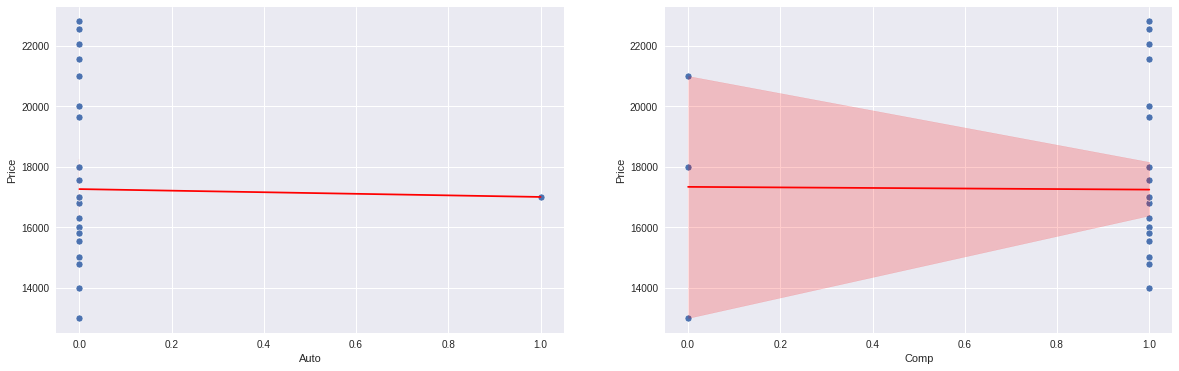

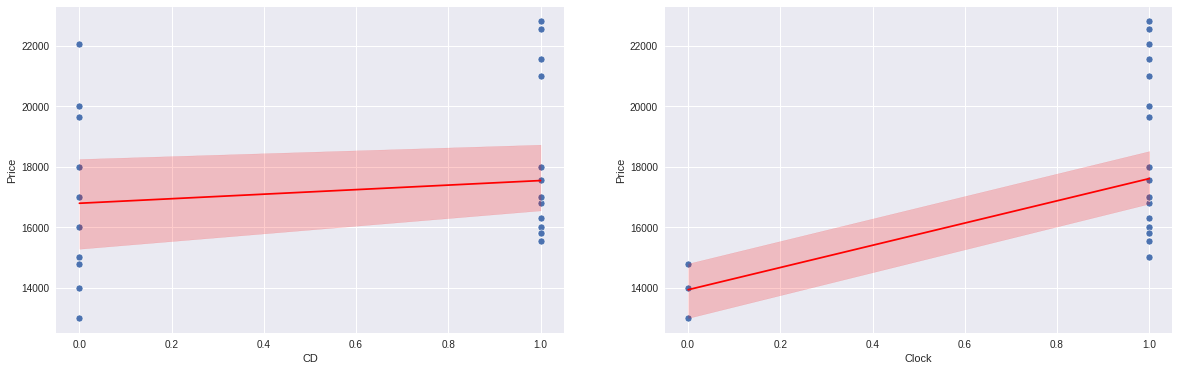

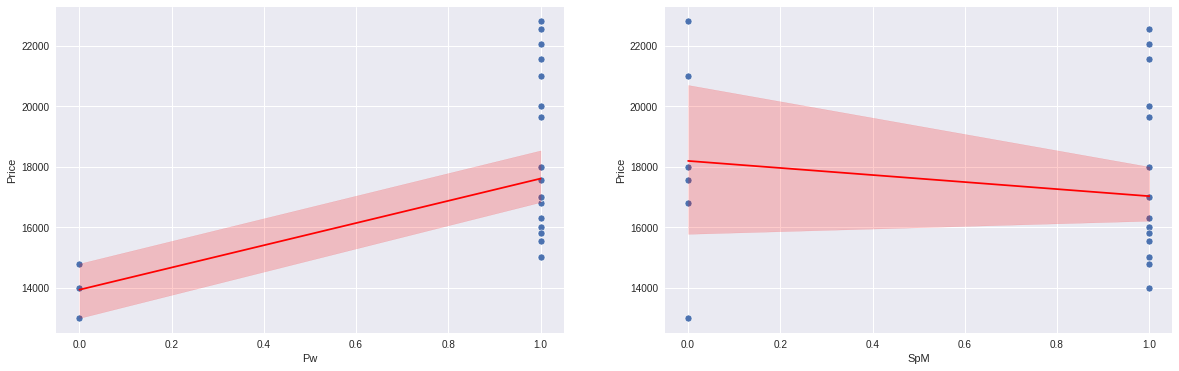

In [503]:
# Comparing features with Price
cols = ['Auto','Comp', 'CD','Clock','Pw', 'SpM']
i = 0
while i < 6:
    fig = plt.figure(figsize=[20,6])
    
    plt.subplot(1,2,1)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i +=1
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i += 1

    plt.show()

###Comparison of features with Price

####1.  Automatic Transmission

Almost all cars selling have manual transmission and have varied pricing.

####2.   Board Computer

Cars having board computers are more in number and have a higher price.

####3.   CD player

Cars with CD player have a slightly higher price.

####4.   Central Locking

Cars with Central locking have a higher price.

####5.   Power windows

Cars with power windows have a higher price.

####6.   Sports Model

Both normal and sports models almost have a similar average price.





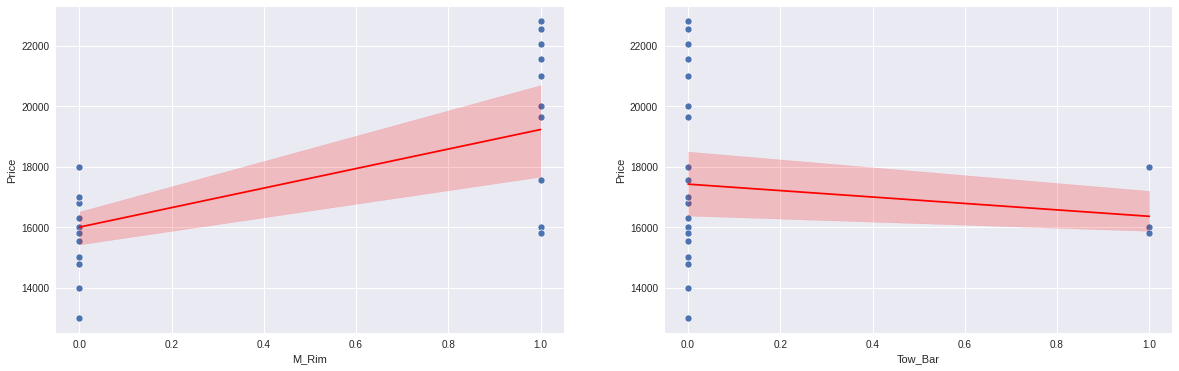

In [504]:
# Comparing features with Price
cols = ['M_Rim','Tow_Bar']
i = 0
while i < 2:
    fig = plt.figure(figsize=[20,6])
    
    plt.subplot(1,2,1)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i +=1
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=cols[i],y='Price', data=new_auto)
    sns.lineplot(data=new_auto, x=cols[i], y='Price',estimator='mean', color='red')
    i += 1

    plt.show()

###Comparison of features with Price

####1.  Metallic Rim

Cars with metallic rim have higher price.

####2.   Board Computer

Most cars do not have tow bars, and have a varied pricing.






### Correlation between features

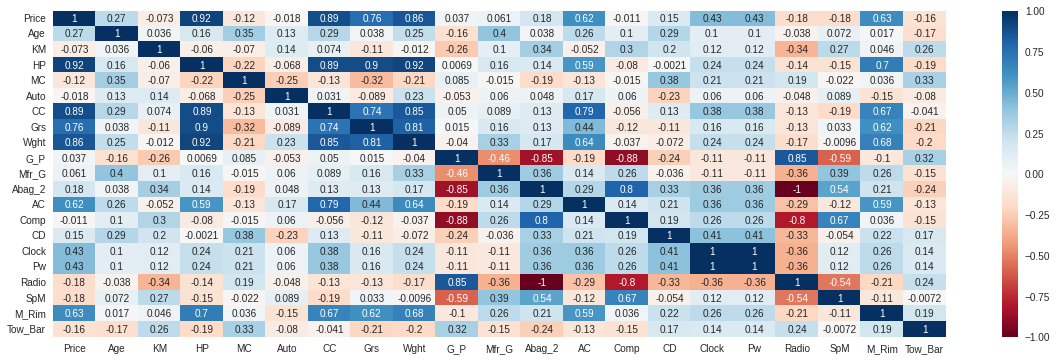

In [505]:
# Plotting a heatmap of correlation
plt.figure(figsize=[20,6])
sns.heatmap(new_auto.corr(), annot = True, cmap='RdBu')
plt.show()

###Factors which affect Price the most are:


1.   Horse Power
2.   Cylindrical Volume
3.   Number of Gears
4.   Weight of the vehicle
5.   Air Conditioning
6.   Central Locking
7.   Power Windows
8.   Metallic Rims

###It depends slightly on:

1.   Age of the car
2.   Passenger Airbag





### Converting categorical column colors to dummies

In [506]:
# Converting to dummies
new_auto = pd.get_dummies(data=new_auto, drop_first=True)

###Train Test split

In [507]:
# Creating target variable
price = new_auto[['Price']]

In [508]:
# Splitting data into train test set
X_train, X_test, y_train, y_test = train_test_split(new_auto, price, test_size=0.2)

### Comparing between ML Models. Linear Regression, Random Forest and XGBoost.

In [509]:
#Define models to test:

base_models = {"Linear Regression" : LinearRegression(),                      #Linear Regression model
               "Random Forest": RandomForestRegressor(n_estimators=300),      #Random Forest model
               "XGBoost" : XGBRegressor(),
}

In [510]:
# Preprocessing, fitting, making predictions and scoring for every model:
models_data = {'R^2':{'Training':{},'Testing':{}},
               'Adjusted R^2':{'Training':{},'Testing':{}},
               'MAE':{'Training':{},'Testing':{}},
               'MSE':{'Training':{},'Testing':{}},
               'RMSE':{'Training':{},'Testing':{}}}

p = new_auto.shape[1]
train_n = X_train.shape[0]
test_n = X_test.shape[0]

for name in base_models:
    #fitting the model
    model = base_models[name].fit(X_train, y_train)
    #make predictions with train and test datasets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #calculate the R-Squared for training and testing
    r2_train,r2_test = model.score(X_train, y_train), model.score(X_test, y_test)
    models_data['R^2']['Training'][name], models_data['R^2']['Testing'][name] = r2_train, r2_test
            
    #calculate the Adjusted R-Squared for training and testing
    adj_train, adj_test = (1-(1-r2_train)*(train_n-1)/(train_n-p-1)) ,(1-(1-r2_test)*(train_n-1)/(train_n-p-1))
    models_data['Adjusted R^2']['Training'][name], models_data['Adjusted R^2']['Testing'][name] = adj_train, adj_test
               
    #calculate the Mean absolute error for training and testing
    mae_train, mae_test = mean_absolute_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)         
    models_data['MAE']['Training'][name], models_data['MAE']['Testing'][name] = mae_train, mae_test
               
    #calculate Mean square error for training and testing
    mse_train, mse_test = mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)
    models_data['MSE']['Training'][name], models_data['MSE']['Testing'][name] = mse_train, mse_test

    #calculate Root mean error for training and testing    
    rmse_train, rmse_test = np.sqrt(mse_train), np.sqrt(mse_test)
    models_data['RMSE']['Training'][name], models_data['RMSE']['Testing'][name] = rmse_train, rmse_test
    
    print('\n========================={}========================='.format(name))
    print('**********Training**********************Testing********')
    print('R^2    : ',r2_train,' '*(25-len(str(r2_train))),r2_test) 
    print('Adj R^2: ',adj_train,' '*(25-len(str(adj_train))),adj_test) 
    print('MAE    : ',mae_train,' '*(25-len(str(mae_train))),mae_test) 
    print('MSE    : ',mse_train,' '*(25-len(str(mse_train))),mse_test) 
    print('RMSE   : ',rmse_train,' '*(25-len(str(rmse_train))),rmse_test)


=========================Linear Regression=========================
**********Training**********************Testing********
R^2    :  1.0                        1.0
Adj R^2:  1.0                        1.0
MAE    :  3.5621875819439688e-12     5.57756070178613e-23
MSE    :  2.7434823649675416e-23     5.57756070178613e-23
RMSE   :  5.237826233245564e-12      7.468306837420466e-12

=========================Random Forest=========================
**********Training**********************Testing********
R^2    :  0.9919080593152939         0.9473911827986686
Adj R^2:  1.06203821191608           1.4033342652102072
MAE    :  146.88611111111118         294797.2649603174
MSE    :  51993.60692129631          294797.2649603174
RMSE   :  228.02106683658928         542.9523597520481
[17:02:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

=========================XGBoost=========================
**********Training****************

All the models give a high r-square score and have a perfect performance. 

### Neural Network

In [602]:
# Importing Neural Network Libraries
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score

# Model development
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop', metrics=[r2_score], run_eagerly=True)
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_242 (Dense)           (None, 100)               2700      
                                                                 
 dense_243 (Dense)           (None, 150)               15150     
                                                                 
 dense_244 (Dense)           (None, 50)                7550      
                                                                 
 dense_245 (Dense)           (None, 5)                 255       
                                                                 
 dense_246 (Dense)           (None, 1)                 6         
                                                                 
Total params: 25,661
Trainable params: 25,661
Non-trainable params: 0
_________________________________________________________________


In [603]:
# Fitting the data into the model
history = model.fit(x=X_train, y=y_train, epochs=125, validation_data=(X_test, y_test), verbose=0)

### Testing the Neural Network Model

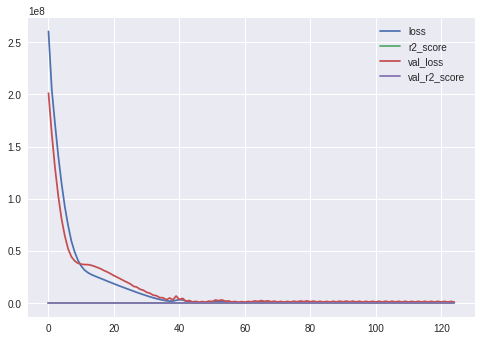

In [604]:
# Plotting loss function
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [605]:
# R-Square test on the test set
test_pred = model.predict(X_test)
r2_test = r2_score(y_test, test_pred)
print("R Squared value of test dataL: ",r2_test)

1/1 [==============================] - 0s 25ms/step
R Squared value of test dataL:  0.8117833120378162


We get a high R-square score but less when compared to Linear regression.

### Comparison with Linear Regression

In [515]:
LinearReg = LinearRegression()
LinearReg.fit(X_train,y_train)

LinearRegression()

In [516]:
# Getting predictions from LR
pred = LinearReg.predict(X_test)

In [517]:
# Converting dataframe to array
actual = y_test.to_numpy()

### Plotting the comparison

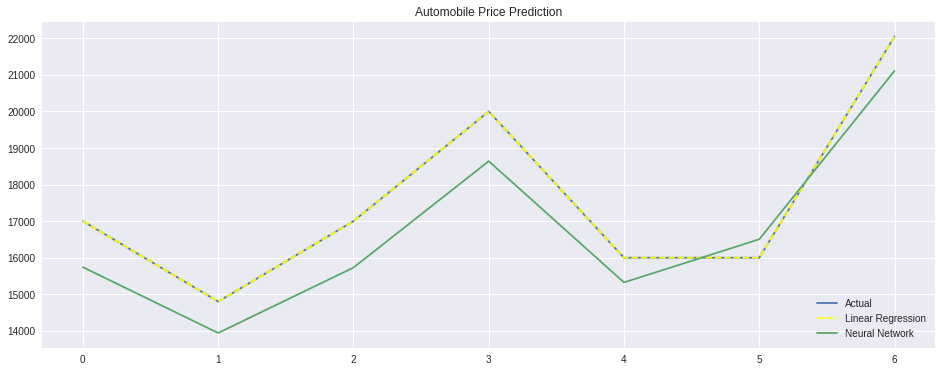

In [606]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Automobile Price Prediction')
plt.plot(actual)
plt.plot(pred, color = 'yellow', linestyle='dashed')
plt.plot(test_pred)
plt.legend(['Actual','Linear Regression', 'Neural Network'], loc='lower right')
plt.show()

The Neural Network model performs well, but Linear Regression is highly accurate and predicts perfectly. 